<!-- Template 
Auteur: Olivier Pannekoucke
Date: 24/09/2018
Description: 
   Introduction aux notebook jupyter et à la création/valorisation d'un travail scientifique.
-->
<center>
<h1> Équations aux dérivées ordinaires </h1>

</center>

<h3 style="font-variant:small-caps;"><center>Résumé</center></h3>

<div style="margin:0 50px 0 50px">
<p style="background:rgb(230,230,255)">
L'objectif de ce calepin (ou notebook) est d'explorer la notion de résolution numérique d'une équation au dérivée ordinaire ou d'une système de telles équations.
<br>
Le travail débute par un exemple simple, l'<b>oscillateur harmonique</b>, qui permet de rappeler des notions élémentaires sur les systèmes dynamiques. Une analyse physique, puis mathématique permet de comprendre la dynamique et d'introduire la résolution numérique. En particulier, un premier code de calcul est proposé pour la résolution de cette dynamique. Cet exemple illustre la conversion d'une équation différentielle ordinaire vers un système d'équation différentielle d'ordre 1.
    <br>
Pour l'oscillateur harmonique, la résolution numérique n'est pas pertinente puisqu'il existe des solutions analytiques simples. On s'intéresse alors à un autre problème modèle: l'<b>oscillateur non-linéaire</b>; dont il n'existe pas de solution simple. L'exploration numérique permet de caractériser les propriétés des trajectoires qu'il peut être difficile de caractériser analytiquement.
    <br> Ces deux oscillateurs illustrent des dynamiques dans un espace de dimension $2$. Or dans les problèmes rencontrés en météorologie, la dimension des espaces manipulés peut être supérieur à $10^9$. Afin de se sensibiliser à des problèmes en plus grande dimension, <b>un modèle de dimension intermédiaire, 40</b> est introduit, ce nombre de dimension pouvant être modifié à loisir.
<p>
<b>keywords</b>: <i> Schéma temporel, pas liés/séparés, time spliting </i>
</p>
    
</div>

---
<center><h5> Content </h5></center>

 1. [L'oscillateur linéaire](#oscillateur)
   1. [Aspects théoriques](#oscillateur-theorie)
   1. [Vers la résolution numérique de l'oscillateur linéaire](#oscillateur-discretisation)
   1. [Résolution numérique de l'oscillateur linéaire](#oscillateur-numerique)
 1. [Oscillateur nonlinéaire](#oscillateur-nl)
 1. [Modèle de dimension intermédiaire (40 ou plus..)](#m40)
 1. [Conclusion](#conclusion)

---

In [1]:
# En guise d'exemple voici un petit code pour insérer des figures..  voir également 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return x**2

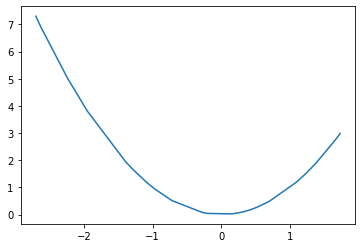

In [2]:
x = np.random.normal(size=(30))
x.sort()
y = f(x)
plt.plot(x,y)

## 2. Oscillateur linéaire <a id='oscillateur'>

L'objectif de cette section est d'implémenter un code de calcul permettant de simuler numériquement un oscillateur linéaire d'équation
\begin{equation}
(1) \quad \ddot x + \omega^2 x = 0
\end{equation}

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:MistyRose">
    
 1. Montrez qu'il est toujours possible de transformer une équation différentielle ordinaire d'ordre élevée sous la forme d'un système d'équation différentielle ordinaire de degré $1$ 
\begin{equation}
(2)\quad\frac{dX}{dt}=f(X),
\end{equation}
 1. Indiquez la forme de  $X$ et  $f$ dans le cas de la dynamique (1)
 1. Quel est la nature mathématique de $X$ et $f(X)$ ?

</div>
</div>

<div style="background:lightBlue">
<b>Réponse:</b> <br> 
    <ol>
    <li> Pour réduire l'ordre d'une EDO on procède à un changement de variable. 
        Preuve : soit l'EDO $F(t, y, y', ..., y^{(n)})=0$
        On pose $Z = (z_1 , z_2, ..., z_n)$
        avec $z_1 = y, z_2= y', ..., z_n = y^{(n-1)}$
        L'EDO d'ordre n devient : $H(t, z_1, z_2, ..., z_n, z_n') = 0$
    <li> $ X = \begin{bmatrix}\dot{x} \\ x \end{bmatrix} $ et $ f = \begin{bmatrix} 0 & -\omega^{2} \\ 1 & 0 \end{bmatrix} $
    <li> Ce sont des vecteurs de dimension 2. f(X) est le produit de la matrice f et du vecteur X.
    </ol>
</div>

### Vers la résolution numérique de l'oscillateur linéaire <a id='oscillateur-discretisation'/>

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:MistyRose">
Comment pourrait-on résoudre la dynamique (1) à l'aide d'un ordinateur ? <b>sans s'appuyer sur la solution théorique</b>
</div>
</div>

<div style="background:lightBlue">
<b>Réponse:</b> <br> 
    Méthode des différences finies (méthode d'Euler via la formule de Taylor)<br>
    Apport de la formule de Taylor:<br>
    $X(t+\Delta t) = X(t) + \Delta t \dfrac{dX(t)}{dt} + o(\Delta t) $<br>
    d'où : <br>
    $\dfrac{dX(t)}{dt} \simeq \dfrac{X(t+\Delta t) - X(t)}{ \Delta t}$
</div>

### Résolution numérique de l'oscillateur linéaire

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:MistyRose">
Proposez un code écrit en python, permettant de résoudre la dynamique partant de la condition initiale $x=1$, $\dot x=0$ 
</div>
</div>

In [3]:
#Intialisation des paramètres et des variables
omega = 2
dt = 0.01
iterations = int(4*(2*np.pi/(omega*dt))) #on devra observer 4 périodes
X = np.zeros((2,iterations)) #X[0] correspond à x', X[1] correspond à x
t = np.linspace(0,dt*(iterations-1), iterations) #tableau des temps correspondant à chaque itération
#Condition initiale
X[:,0] = [0, 1]
#Boucle de calcul de l'état suivant
for i in range(1, iterations) :
    X[:,i] = [X[0,i-1] - X[1,i-1] * dt * omega**2, X[1,i-1] + X[0,i-1] * dt] 

    
    
#Rq méthode d'Euler symplectique:

#Temps = 2000 
#T =[t for t in range(Temps)]
#A= [[1],[0]]
#for t in T[:-1] :
#    A[0].append(A[0][-1]+A[1][-1]*dt)
#    A[1].append((A[1][-1]-omega**2*A[0][-2]*dt))

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:rgb(255,230,230)">
Proposez une illustration graphique de la solution
</div>
</div>

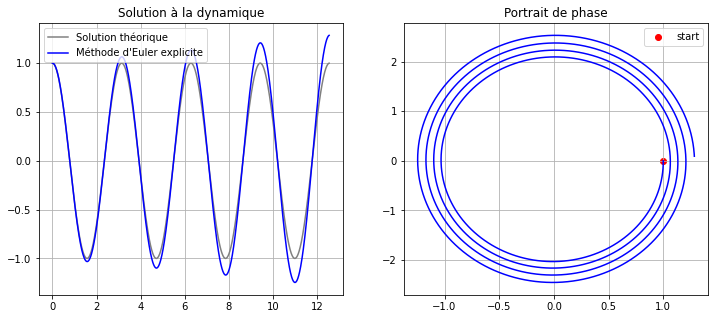

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))
#création de la figure de gauche
ax1.plot(t, np.cos(2*t), color = 'gray', label = 'Solution théorique')
ax1.plot(t, X[1,:], color = 'b', label = "Méthode d'Euler explicite")
ax1.set_title('Solution à la dynamique')
ax1.legend()
ax1.grid()
#création de la figure de droite
ax2.plot(X[1,:],X[0,:], color = 'b')
ax2.scatter(X[1,0],X[0,0], label = 'start', color = 'r')
ax2.set_title('Portrait de phase')
ax2.legend()
ax2.grid()
plt.show()


<div style="background:lightBlue">
<b>Réponse:</b> <br> 
   Lorsqu'on a une solution d'une équation différentielle ordinaire on peut la représenter géométriquement à l'aide de sa trajectoire, c'est-à-dire sa position en fonction du temps. (cf représentation graphique ci-dessus, à gauche). On peut aussi utiliser un diagramme des phases comme ci-dessus (à droite) pour représenter l'état du système (ici vitesse et position) à chaque instant dans l'espace des phases. </div>

<div style="background:lightGreen">
<b>Conclusion intermédiaire:</b> <br> 
Le modèle d'Euler diverge de la solution théorique. D'auntant plus qu'il sagit de la méthode explicite, moins performante que le méthode implicite. En effet, son approximation à l'ordre 1 est trop importante pour bien modéliser la solution de l'équation. Cette résolution n'est pas très utile dans la mesure où il existe une solution analytique simple.</div>

## 3. Oscillateur nonlinéaire <a id='oscillateur-nl'/>

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:rgb(255,230,230)">
Implémentez et étudiez le pendule oscillant à l'aide d'expérimentation numérique
</div>

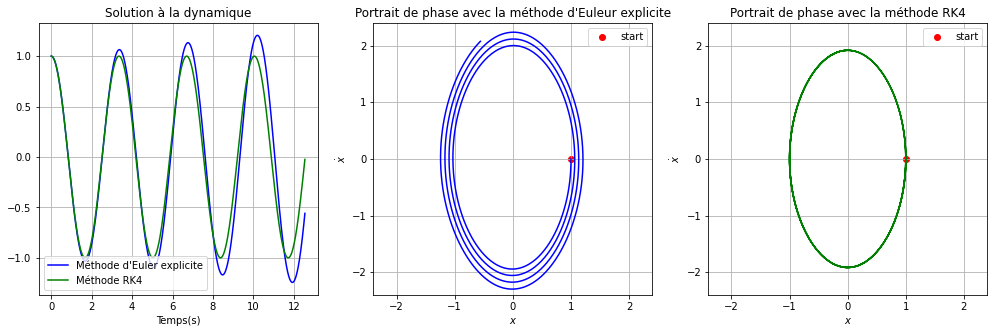

In [5]:
#Intialisation des paramètres et des variables
omega = 2
dt = 0.01
iterations = int(4*(2*np.pi/(omega*dt))) #on s'attend à observer 4 périodes
X = np.zeros((2,iterations)) #stockage des deux variables pour toutes les itérations, calculé par la méthode d'Euler explicite
X_rk4 = np.zeros((2,iterations)) #idem mais calculé par la méthode de Runge-Kutta d'o.4
t = np.linspace(0,dt*(iterations-1), iterations) #tableau des temps correspondant à chaque itération

#Conditon initiale
X[:,0] = [0, 1]
X_rk4[:,0] = [0, 1]


'''Méthode d'Euler explicite'''
#Boucle de calcul de l'état 
for i in range(1, iterations) :
    X[:,i] = [X[0,i-1] - np.sin(X[1,i-1]) * dt * omega**2, X[1,i-1] + X[0,i-1] * dt]

    
'''Méthode RK4'''

X_temp = np.zeros((2))

def kx_0(X_temp) : #calcul les pentes pour x'
    return - np.sin(X_temp[1]) * omega**2

def kx_1(X_temps) : #calcul les pentes pour x
    return X_temp[0]

#Boucle de calcul de l'état suivant
for i in range(1, iterations) :
    #calcul, un à un, des pentes pour chaque variable
    X_temp = X_rk4[:,i-1]
    k1_0,  k1_1 = kx_0(X_temp), kx_1(X_temp)
    X_temp = [X_rk4[0, i-1] + k1_0*dt/2, X_rk4[1, i-1] + k1_1*dt/2]
    k2_0,  k2_1 = kx_0(X_temp), kx_1(X_temp)
    X_temp = [X_rk4[0, i-1] + k2_0*dt/2, X_rk4[1, i-1] + k2_1*dt/2]
    k3_0,  k3_1 = kx_0(X_temp), kx_1(X_temp)
    X_temp = [X_rk4[0, i-1] + k3_0*dt, X_rk4[1, i-1] + k3_1*dt]
    k4_0,  k4_1 = kx_0(X_temp), kx_1(X_temp)
    X_rk4[:,i] = [X_rk4[0,i-1] + (dt/6) * (k1_0 + 2*k2_0 + 2*k3_0 + k4_0), X_rk4[1,i-1] + (dt/6) * (k1_1 + 2*k2_1 + 2*k3_1 + k4_1)]

#Tracé des figures
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (17,5))
ax1.plot(t, X[1,:], color = 'b', label = "Méthode d'Euler explicite")
ax1.plot(t, X_rk4[1,:], color = 'g', label = "Méthode RK4")
# ax1.plot(t, np.abs(X[1,:]-X_rk4[1,:]), color = 'r', label = 'Erreur absolue (entre les méthodes)')
ax1.set_title('Solution à la dynamique')
ax1.set_xlabel('Temps(s)')
ax1.legend()
ax1.grid()

ax2.plot(X[1,:],X[0,:], color = 'b')
ax2.scatter(X[1,0],X[0,0], label = 'start', color = 'r')
ax2.set_title("Portrait de phase avec la méthode d'Euleur explicite")
ax2.set_xlim([-2.4 ,2.4])
ax2.set_ylim([-2.4 ,2.4])
ax2.set_xlabel('$x$')
ax2.set_ylabel('$\dot{x}$')
ax2.legend()
ax2.grid()

ax3.plot(X_rk4[1,:],X_rk4[0,:], color = 'g')
ax3.scatter(X_rk4[1,0],X_rk4[0,0], label = 'start', color = 'r')
ax3.set_title('Portrait de phase avec la méthode RK4')
ax3.set_xlim([-2.4 ,2.4])
ax3.set_ylim([-2.4 ,2.4])
ax3.set_xlabel('$x$')
ax3.set_ylabel('$\dot{x}$')
ax3.sharey(ax2)
ax3.legend()
ax3.grid()
plt.show()

<div style="background:lightGreen">
<b>Conclusion intermédiaire:</b> <br> 
Comme on pouvait s'y attendre, on obtient, avec la méthode d'Euler, une solution qui diverge (cf. portait de phase). Pour palier ce problème, on se propose d'introduire la méthode de Runge-Kutta d'ordre 4, qui d'après son portrait de phase, est autrement plus performante. De plus, la nature non-linéaire du problème donne une solution numérique de période différente de celle liée à la pulsation (on n'observe pas 4 périodes). On remarque alors qu'une résolution numérique -bien mise en oeuvre- peut être plus simple et plus courte qu'une longue recherche théorique de la solution analytique. </div>

## 4. Modèle de dimension intermédiaire (40 ou plus..) <a id='m40'/>

L'objectif de cette section est d'implémenter la dynamique 
\begin{equation}
(4)\quad\frac{dX_k}{dt} = -X_{k-2}X_{k-1} + X_{k-1} X_{k+1} -X_k +F, 
\end{equation}
avec $X_{K}=X_0$ (condition périodique), avec $K=40$ et $F=8$.

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:rgb(255,230,230)">

 1. Quel est l'intérêt d'étudier cette dynamique ? **Attention**: <b><i>vous répondrez à cette question en replaçant l'exemple dans le contexte précis de l'étude qui est menée dans ce travail)</i></b>
 1. Donnez l'interprétation géométrique du système Eq.(4) dans l'espace $\mathbb{R}^K$    

</div>
</div>

<div style="background:lightBlue">
<b>Réponse:</b> <br> 
 1. Ces équations permettent de modéliser un problème plus réaliste (comme l'évolution de l'atmosphère) avec : la variation temporelle d'un variable qui dépend d'un terme de forçage (terme constant F), d'un terme de dissipation (terme linéaire -Xk) et de deux termes non-linéaires (les termes quadratiques). On peut utiliser autant de variable que l'on souhaite (ici 40) et donc se rapprocher des modeles météo à $10^9$ paramètres. C'est une première approche aux systèmes de grande dimension. L'intérêt principal de cet étude est d'observer et d'apréhender la sensibilité d'une solution numérique à un schéma de résolution numérique dans le cadre d'une système déterministe de grande dimension (donc d'aspect chaotique).
 <br>2. La notion de trajectoire reste valide en dimension n. En effet, le système d'équation Eq.(4) nous permet de trouver les coordonnées d'un nouveau point dans l'espace de dimension 40 et à tout instant. (La trajectoire est donc dans un espace de dimension 41, en comptant le temps.)
On peut représenter la trajectoire en 2D en projettant la trajectoire sur une des dimension de l'espace (trajectoire d'une variable).
<br>
De la même façon, l'espace des phases est ici de dimension 40. Puisque ce n'est pas représentable, on peut réaliser des projections sur 2 dimensions :
on représente donc une variable en fonction d'une autre, ce qui permet d'étudier la solution au problème (tests statistiques, etc..).
 <br>
Rq : On peut supposer que la condition périodique permet de fermer le système.
</div>

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:rgb(255,230,230)">
Proposez un code de calcul permettant de résoudre numériquement le système donné en Eq.(4).
</div>
</div>

In [6]:
import random
#parametre
F = 8
dt = 0.05
iterations = 500

#declaration des variables
X = np.zeros((43,iterations)) #Contient tous les Xk pour toutes les itérations
t = np.linspace(0,dt*(iterations-1), iterations)

X[:,0] = [random.randint(-5,5) for i in range(43)] #initialisation aléatoire

In [7]:
#Methode RK4 V4_fonctionnelle

#Initilisation d'un vecteur contenant les 4 variables nécessaires au calcul de l'itération intermédiaire suivante
X_temp = np.zeros((43,4))
pentes = np.zeros((40,4))

def kx(X) : #fonction de calcul d'une pentes à partir des Xk temporaires
    return -X[0] * X[1] + X[1] * X[3] - X[2] + F

def calc_pentes(X_temp, matrice_pentes, indice_pente) : #calcul des pentes kx pour toutes les variables
    for k in range(40) : 
        k_app = k + 2
        matrice_pentes[k, indice_pente] = kx(X_temp[k_app-2:k_app+2, indice_pente])

def bouclage(X, i) : #fonction de bouclage pour la condition periodique
    X[42][i] = X[2][i]
    X[1][i] = X[41][i]
    X[0][i] = X[40][i]
    

for i in range(1, iterations) : #boucle de calcul de l'état suivant par la méthode de RK4
    
    bouclage(X, i-1)
    
    X_temp[:,0] = X[:,i-1] 
    calc_pentes(X_temp, pentes, 0) #calcul des pentes k1 pour toutes les variables
    X_temp[2:42, 1] = X_temp[2:42,0] + dt/2 * pentes[:,0] #calcul des Xk intermediaires avec k1 par la méthode d'euler
    bouclage(X_temp, 1)
    
    calc_pentes(X_temp, pentes, 1) #calcul des pentes k2 pour toutes les variables
    X_temp[2:42, 2] = X_temp[2:42,1] + dt/2 * pentes[:,1] #calcul des Xk intermediaires avec k2 par la méthode d'euler
    bouclage(X_temp, 2)
    
    calc_pentes(X_temp, pentes, 2) #calcul des pentes k3 pour toutes les variables
    X_temp[2:42, 3] = X_temp[2:42,2] + dt * pentes[:,2] #calcul des Xk intermediaires avec k3 par la méthode d'euler
    bouclage(X_temp, 3)

    calc_pentes(X_temp, pentes, 3) #calcul des pentes k4 pour toutes les variables

    X[2:42,i] = X[2:42,i-1] + dt * (pentes[:, 0] + 2*pentes[:, 1] + 2*pentes[:, 2] + pentes[:, 3]) / 6


<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:rgb(255,230,230)">
Proposez des représentations graphiques pour illustrer les solutions de Eq.(4)
</div>
</div>

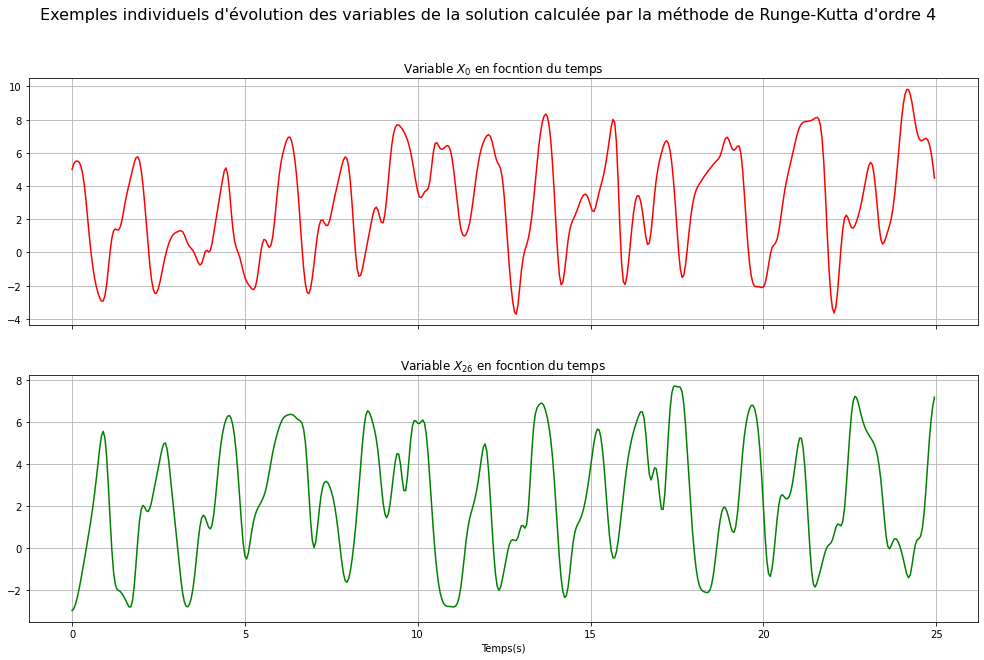

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (17,10), sharex = 'all')
ax1.plot(t, X[2,:], color = 'r')
ax1.set_title("Variable $X_{0}$ en focntion du temps")
ax1.grid()
ax2.plot(t, X[28,:], color = 'g')
ax2.set_title("Variable $X_{26}$ en focntion du temps")
ax2.set_xlabel('Temps(s)')
ax2.grid()
fig.suptitle("Exemples individuels d'évolution des variables de la solution calculée par la méthode de Runge-Kutta d'ordre 4", fontsize = 16)
plt.show()

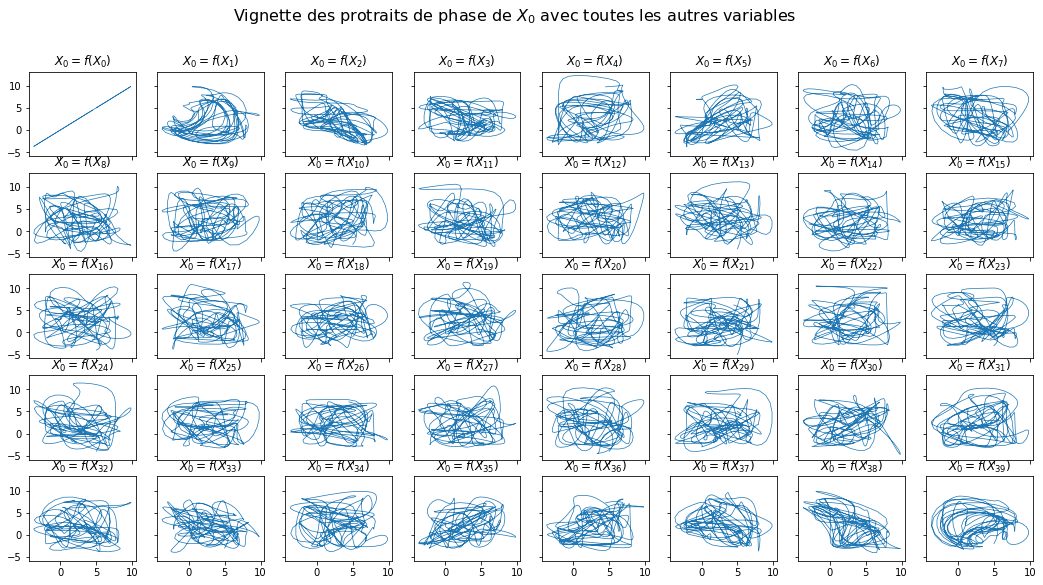

In [9]:
fig, axs = plt.subplots(5, 8, figsize = (18, 9), sharex='all', sharey='all')
j, k = 0, 0
for i in range(40) :
    if i <= 7 :
        axs[0,i].plot(X[2,:], X[i+2,:], lw = 0.7)
        axs[0,i].set_title('$X_0 = f(X_{})$'.format(str('{'+str(i)+'}')))
    if i > 7 :
        k = i // 8
        j = i - 8 * k
        axs[k,j].plot(X[2,:], X[i+2,:], lw = 0.7)
        axs[k,j].set_title('$X_0 = f(X_{})$'.format(str('{'+str(i)+'}')))
fig.suptitle('Vignette des protraits de phase de $X_0$ avec toutes les autres variables', fontsize = 16)
plt.show()

<div style="background:lightGreen">
<b>Conclusion intermédiaire:</b> <br> 
Sur un problème de grande dimension, il est plus intéressant d'utiliser une méthode plus précise que la méthode d'Euler, comme la methode de Runge-Kutta d'ordre 4, qui est plus utilisée.
Les solutions numérique de Euler et de RK4 ont un aspect cohérent, mais sont très différentes. La méthode utilisée influe donc définitivement sur la solution numérique, d'autant plus sur un problème déterministe comme celui-ci. </div>

## 5. Conclusion <a id='conclusion'/>

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:rgb(255,230,230)">
    
Dressez une synthèse pour le travail réalisé. <br>
**Attention, cette synthèse doit être représentative du travail réalisé, suivant les objectif qui ont été fixé pour l'étude.**
    
</div>
</div>

<div style="background:lightGreen">
<b>Conclusion:</b> <br> 
Une exploration de deux méthodes de résolution numérique a été suivis dans ce travail (Euler, RK4).
<br>
La méthode d'Euler avait déjà été manipulé mais ce n'était pas le cas de la méthode de Runge-Kutta, qu'il a fallu s'approprier. De nombreuses difficultés ont été rencontrées, notamment et surtout pour la résolution de la dynamique en dimension 40. Il a été, au début, difficile de se représenter le problème et de définir un algorithme de calcul clair. Cela a entraîné des erreurs parfois couteuses en terme de temps:<br><br>
<dd>   <dl>- La condition périodique avait, dans un premier temps, un défaut de codage (problème sur un index de liste). Cela avait pour conséquence de faire diverger la "solution" très rapidement. Le soucis a été repéré grâce à un petit algorithme permettant de savoir laquelle des 40 variables "explosait" la première (detection via un seuil arbitraire). Il a alors été remarqué que la divergence était toujours causée par l'explosion des variables 38 et 39. Ce qui a permis de conclure sur une erreur de bouclage de la liste des variables.</dl>
   <dl> - Il y avait un problème de réécriture involontaire d'une matrice en cours d'itération, la solution aura été de passer par des matrices intermédaires plus volumineuses qu'initialement prévu.</dl>
    <dl>- Le calcul des points intermédiaires de la méthode de Runge-Kutta était biaisé, en effet certains étaient calculé avec la pente destinée à calculer la variable voisine. Cette erreur était vicieuse dans la mesure où elle ne causait pas de divergence explosive. Elle a été détecté en faisant tourner l'algorithme sur un très grand nombre d'itérations: une divergence lente mais évidente apparaissait.</dl></dd>
<br>
    Cela a permis de mettre l'accent sur la nécessité d'aprocher rigoureusement le problème, car sa complexité propre additionnée a celle de la méthode utilisée peut être rendre le travail difficile.<br>
Nous avons saisi l'intéret de la résolution numérique pour les problème complexes (non-linéaire, grande dimension). Au vu des solutions numérqiues divergentes avec la méthode d'Euler, nous comprenons l'importance d'utiliser des méthodes d'ordre plus élevé de type Runge-Kutta d'o.4.<br>
Un des enjeux de ce type de problème est la représentation de la dérivée, qui peut être représentée fidèlement par le calcul symbolique.</div>